<a href="https://colab.research.google.com/github/NayelySaldivar/labs_modelo_ironhack_data/blob/main/lab-time-series/your-code/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [4]:
sensor = pd.read_csv('sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [5]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
sensor.isnull().sum()[sensor.isnull().sum() > 0]
# No hay nulos

Series([], dtype: int64)

How many rows and columns are in our data?

In [7]:
len(sensor.columns)

12

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [8]:
infer = pd.date_range('1/1/2018 00:00:00', '1/1/2018 00:29:10', periods = sensor.shape[0])

Assign the time series index to the dataframe's index.

In [9]:
sensor.set_index(infer, inplace=True)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](https://github.com/NayelySaldivar/labs_modelo_ironhack_data/blob/main/lab-time-series/images/tsa_decompose.png?raw=1)

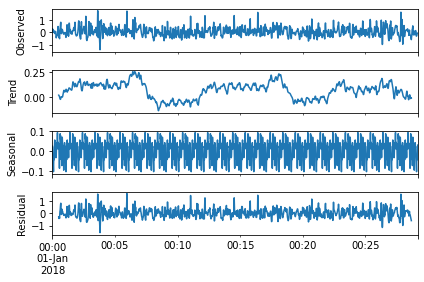

In [10]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq = 60, model = 'additive')
fig = decomposition.plot()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

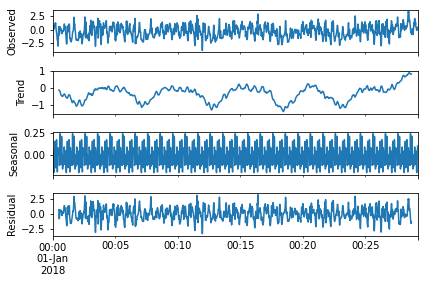

In [11]:
decomposition = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq = 60, model = 'additive')
fig = decomposition.plot()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

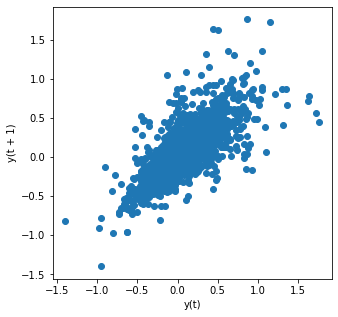

In [12]:
fig = plt.figure(figsize=(5,5))
pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=1);

Create a lag plot for `rotationRate.x`

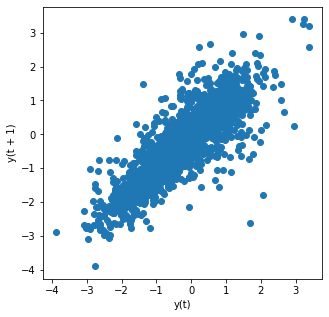

In [13]:
fig = plt.figure(figsize=(5,5))
pd.plotting.lag_plot(sensor['rotationRate.x'], lag=1);

What are your conclusions from both visualizations?

In [14]:
# Existe una autocorrelación positiva, se ve claramente para ambas variables 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [15]:
from statsmodels.tsa.stattools import adfuller


for col in ['userAcceleration.x','rotationRate.x' ]:
    
    print('\n','-'*5, 'Columna:', col)
    print('Los datos son estacionarios')
    dftest = adfuller(sensor[col], autolag=None)

    print(f'Estadístico de la prueba: {dftest[0]}')
    print(f'P-Value: {dftest[1]}')
    print(f'Valores críticos:')
    for k, v in dftest[4].items():
        print('\t{}:{} Los datos son {} estacionarios con {}% de confianza'.format(k, v, "not" if v < dftest[0] else "", 100-int(k[:-1])))


 ----- Columna: userAcceleration.x
Los datos son estacionarios
Estadístico de la prueba: -8.160095026835917
P-Value: 9.193147705719652e-13
Valores críticos:
	1%:-3.4341465551936534 Los datos son  estacionarios con 99% de confianza
	5%:-2.863216966926812 Los datos son  estacionarios con 95% de confianza
	10%:-2.567662770090317 Los datos son  estacionarios con 90% de confianza

 ----- Columna: rotationRate.x
Los datos son estacionarios
Estadístico de la prueba: -5.269860625086436
P-Value: 6.320230335911732e-06
Valores críticos:
	1%:-3.4341465551936534 Los datos son  estacionarios con 99% de confianza
	5%:-2.863216966926812 Los datos son  estacionarios con 95% de confianza
	10%:-2.567662770090317 Los datos son  estacionarios con 90% de confianza


What are your conclusions from this test?

In [16]:
# Podemos afirmar que los datos sí son estacionarios con Un alto porcentaje de confianza.

Finally, we'll create an SARIMAX model for `userAcceleration.x`. Load the `SARIMAX` function from `sm.tsa.statespace` submodule. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [49]:
from statsmodels.tsa.arima_model import ARMA

train = sensor['userAcceleration.x'][:-10]
test = sensor['userAcceleration.x'][-10:]

# ARIMA
model = sm.tsa.statespace.SARIMAX(train, order=(2,0,1))
results = model.fit()
predicciones = results.forecast(steps = 10)

# ARMA
modelo = ARMA(train, order=(2, 1))
model_fit = modelo.fit()
predictions = model_fit.predict(start = '2018-01-01 00:29:01', end = '2018-01-01 00:29:10')

pd.DataFrame([predicciones,predictions], index = ['ARIMA','ARMA']).T

#Primero es nuestro forecast
#Segundo son los errores estimados
#Tercero es el intervalo de confianza

,ARIMA,ARMA
2018-01-01 00:29:01,0.153901,0.173149
2018-01-01 00:29:02,0.100445,0.142896
2018-01-01 00:29:03,0.043036,0.100522
2018-01-01 00:29:04,0.005984,0.070106
2018-01-01 00:29:05,-0.009661,0.056099
2018-01-01 00:29:06,-0.011642,0.053778
2018-01-01 00:29:07,-0.007940,0.056790
2018-01-01 00:29:08,-0.003591,0.060646
2018-01-01 00:29:09,-0.000658,0.063316
2018-01-01 00:29:10,0.000650,0.064493


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [45]:
from statsmodels.tools.eval_measures import rmse

# Raiz cuadrada del error
print(f'ARIMA:{rmse(test, predicciones)}\nARMA:{rmse(test, predictions)}')

ARIMA:0.17283887476080398
ARMA:0.22529864265499716


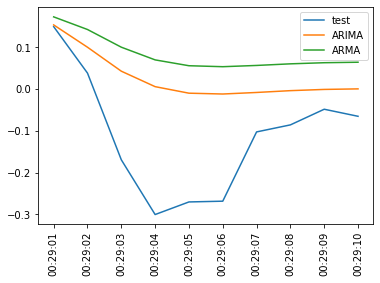

In [47]:
plt.plot(test, label='test')
plt.plot(predicciones,label='ARIMA')
plt.plot(predictions,label='ARMA')
plt.legend()
plt.xticks(rotation = 90)
plt.show()